In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
students = pd.read_csv('stud_math.csv')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

1. Числовых столбцов здесь целых 13, однако, к числовым данным слудет отнести данные только двух последних солбцов.
2. Столбец №20 отсутствует в описании датасета - его следует удалить.

In [4]:
students.drop(['studytime, granular'], inplace=True,
              axis=1)  # удаляем лишний столбец

Рассмотрим остальные столбцы

In [5]:
students.loc[:, ['school']].info()
students['school'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


GP    349
MS     46
Name: school, dtype: int64

Здесь всего два уникальных значения и нет пропусков. Оставляем как есть

In [6]:
students.loc[:, ['sex']].info()
students['sex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


F    208
M    187
Name: sex, dtype: int64

В следующем столбце всё примерно так же.

In [7]:
students.loc[:, ['age']].info()
students['age'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Пропусков нет и все значения между 15 и 22. Оставляем как есть.

In [8]:
students.loc[:, ['address']].info()
students['address'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


U    295
R     83
Name: address, dtype: int64

Здесь мы видим некоторое количество пропусков и заполнить их не представляется возможным.

In [9]:
students.loc[:, ['famsize']].info()
students['famsize'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


GT3    261
LE3    107
Name: famsize, dtype: int64

Аналогично предыдущему столбцу

In [10]:
students.loc[:, ['Pstatus']].info()
students['Pstatus'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


T    314
A     36
Name: Pstatus, dtype: int64

Ровно то же самое. Пропуски заполнить невозможно

In [11]:
students.loc[:, ['Medu']].info()
students['Medu'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Всё так же

In [31]:
students.loc[:, ['Fedu']].info()
students['Fedu'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Здесь мы видим одно значение, не соотвествующее категориям (40.0). Предполагаю, что это должно быть 4.

In [32]:
students.loc[students['Fedu'] == 40.0, 'Fedu'] = 4.0  # Исправим значение

In [34]:
students.loc[:, ['Mjob']].info()
students['Mjob'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Всё соотвествует категориям. Пропуски остаются.

In [35]:
students.loc[:, ['Fjob']].info()
students['Fjob'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Точно так же

In [36]:
students.loc[:, ['reason']].info()
students['reason'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [37]:
students.loc[:, ['guardian']].info()
students['guardian'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


mother    250
father     86
other      28
Name: guardian, dtype: int64

In [38]:
students.loc[:, ['traveltime']].info()
students['traveltime'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [39]:
students.loc[:, ['studytime']].info()
students['studytime'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [40]:
students.loc[:, ['failures']].info()
students['failures'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [41]:
students.loc[:, ['schoolsup']].info()
students['schoolsup'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     335
yes     51
Name: schoolsup, dtype: int64

In [42]:
students.loc[:, ['famsup']].info()
students['famsup'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    219
no     137
Name: famsup, dtype: int64

In [43]:
students.loc[:, ['paid']].info()
students['paid'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     200
yes    155
Name: paid, dtype: int64

In [44]:
students.loc[:, ['activities']].info()
students['activities'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    195
no     186
Name: activities, dtype: int64

In [45]:
students.loc[:, ['nursery']].info()
students['nursery'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    300
no      79
Name: nursery, dtype: int64

In [46]:
students.loc[:, ['higher']].info()
students['higher'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    356
no      19
Name: higher, dtype: int64

In [47]:
students.loc[:, ['internet']].info()
students['internet'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    305
no      56
Name: internet, dtype: int64

In [48]:
students.loc[:, ['romantic']].info()
students['romantic'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     240
yes    124
Name: romantic, dtype: int64

In [49]:
students.loc[:, ['famrel']].info()
students['famrel'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Следует заменить -1.0 на 1.0

In [50]:
students.loc[students['famrel'] == -1.0, 'famrel'] = 1.0  # Аналогично меняем

In [51]:
students.loc[:, ['freetime']].info()
students['freetime'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [52]:
students.loc[:, ['goout']].info()
students['goout'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [53]:
students.loc[:, ['health']].info()
students['health'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

А теперь к числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

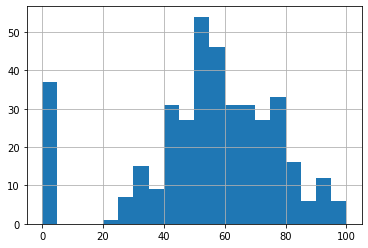

In [54]:
# Рассмотрим столбец score
students.loc[:, ['score']].info()
students.score.hist(bins=20)
students.score.describe()

In [55]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('Q1: {},'.format(perc25), 'Q3: {},'.format(perc75), "IQR: {}, ".format(
    IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Q1: 40.0, Q3: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


1. Очевидно, использована 100-бальная шкала.
2. Выбросов нет, но только потому, что границы выбросов выходят за пределы шкалы.
3. Исходя из того что в датасете нет ни одной оценки между 0 и 20 баллами, 
   следует исключить 36 строк, в которых оценка равна 0.   


In [56]:
# Оставляем только те строки, в которых оценка >= 20
students = students.loc[students.score >= 20]

In [57]:
students.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   352 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  342 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

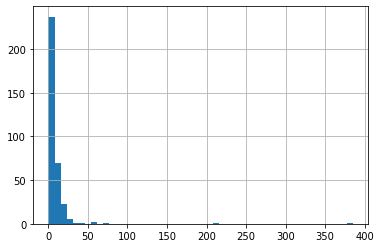

In [58]:
# Проделаем то же самое со столбцом absences
students.loc[:, ['absences']].info()
students.absences.hist(bins=50)
students.absences.describe()

In [59]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('Q1: {},'.format(perc25), 'Q3: {},'.format(perc75), "IQR: {}, ".format(
    IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Q1: 2.0, Q3: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


In [64]:
students[students.absences > 17]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
203,GP,F,17,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,5.0,3.0,2.0,3.0,18.0,30.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0


Здесь мы видим множество выбросов, причём два значения (212 и 385) очевидно, являются следствием ошибки при сборе данных.
Полагаю, что эти две строки придётся исключить.




Осталось применить тест Стьюдента

In [94]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [96]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


На выходе получаем 8 столбцов.

In [100]:
students_for_model = students.loc[:, [
    'age', 'address', 'Medu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'goout']]
students_for_model.head(20)

,age,address,Medu,Mjob,studytime,failures,schoolsup,goout
0,18,U,4.0,at_home,2.0,0.0,yes,4.0
1,17,U,1.0,at_home,2.0,0.0,no,3.0
2,15,U,1.0,at_home,2.0,3.0,yes,2.0
3,15,U,4.0,health,3.0,0.0,no,2.0
4,16,U,3.0,other,2.0,0.0,no,2.0
5,16,U,4.0,services,2.0,0.0,no,2.0
6,16,NaN,2.0,other,2.0,0.0,no,4.0
7,17,U,4.0,other,2.0,0.0,yes,4.0
8,15,U,3.0,services,2.0,0.0,no,2.0
9,15,U,3.0,other,2.0,0.0,no,1.0


1. Учитывая сравнительно небольшое количество пропусков в целом и выбросов в столбцах с количественными данными, качество данных высоко.
2. В дальнейшей работе следует использовать 8 параметров, которые указаны выше.